In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
star = pd.read_csv("50_Startups.csv")
star.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
star.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
model = smf.ols("Profit~Administration+Marketing_Spend+RD_Spend+State",data=star).fit()
print(model.pvalues)

Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
Administration       6.077373e-01
Marketing_Spend      1.226769e-01
RD_Spend             2.578772e-21
dtype: float64


In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.34e-27
Time:                        17:50:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
RD_Spend              0.8060      0.046     17.369      0.000       0.712       0.900
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

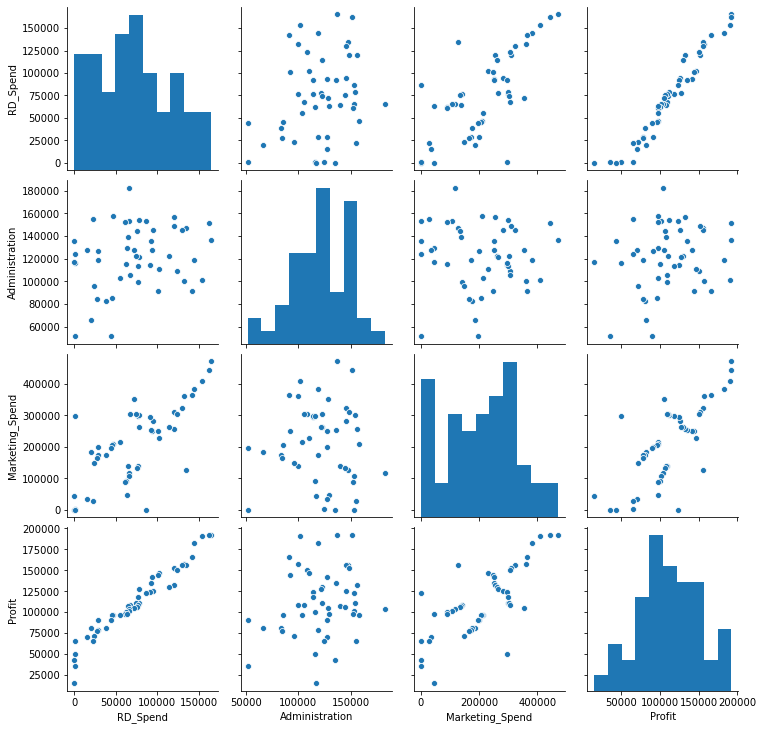

In [6]:
sns.pairplot(star)

In [8]:
star_a = smf.ols('Profit~Administration',data=star).fit()
print(star_a.pvalues)

Intercept         0.003824
Administration    0.162217
dtype: float64


In [9]:
star_ms = smf.ols('Profit~Marketing_Spend',data=star).fit()
print(star_ms.pvalues)

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [12]:
rsq_hp = smf.ols('Administration~RD_Spend+Marketing_Spend',data=star).fit().rsquared  
vif_hp = 1/(1-rsq_hp)
d1 = {'Variables':['Administration','RD_Spend','Marketing_Spend'],'VIF':[vif_hp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

ValueError: arrays must all be same length

In [13]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-17-157d64fbab3a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(star)), np.round(c, 3))


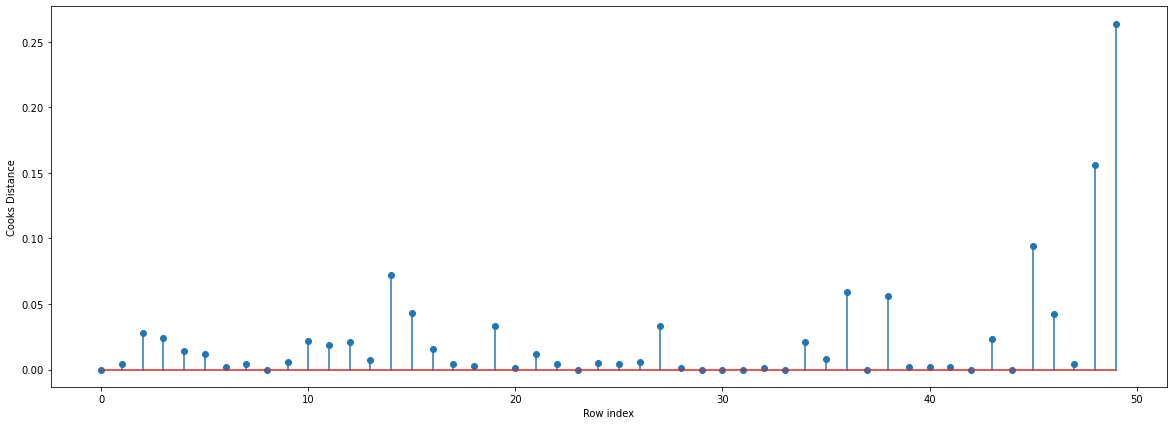

In [17]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(star)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

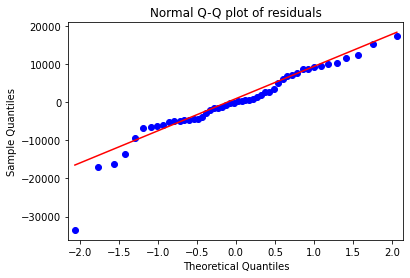

In [9]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

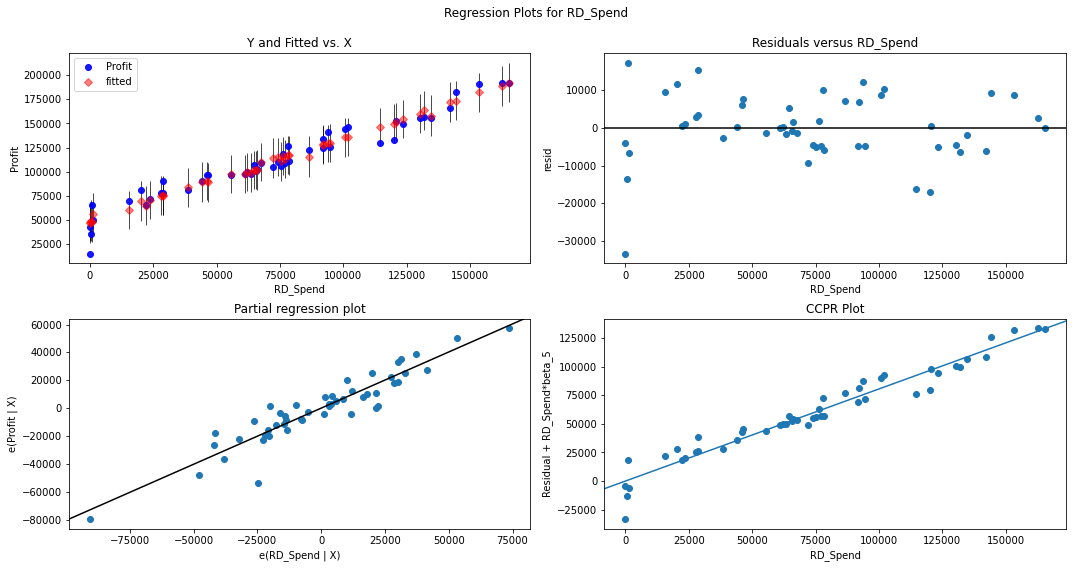

In [11]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

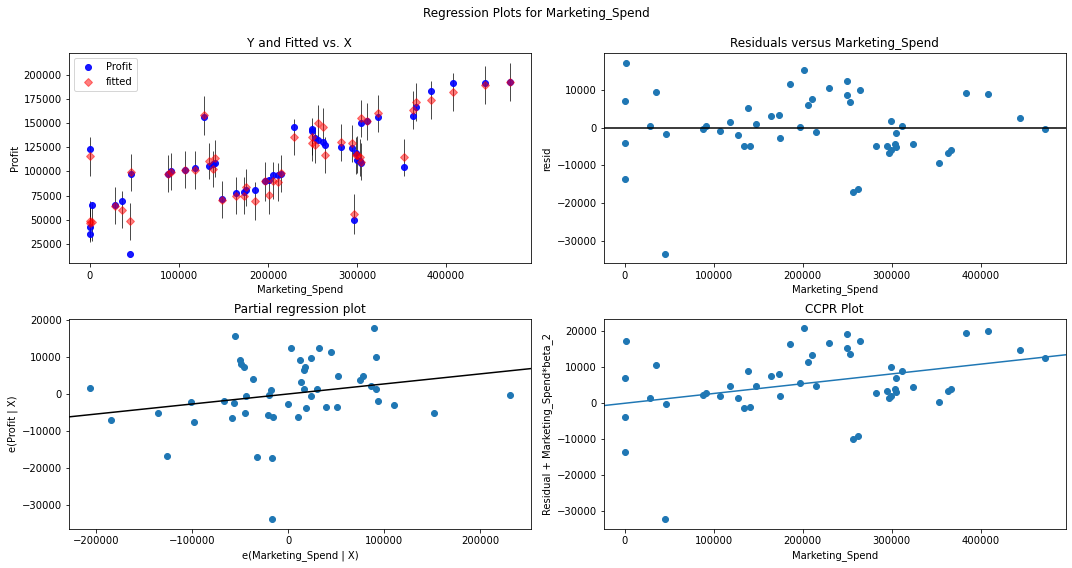

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

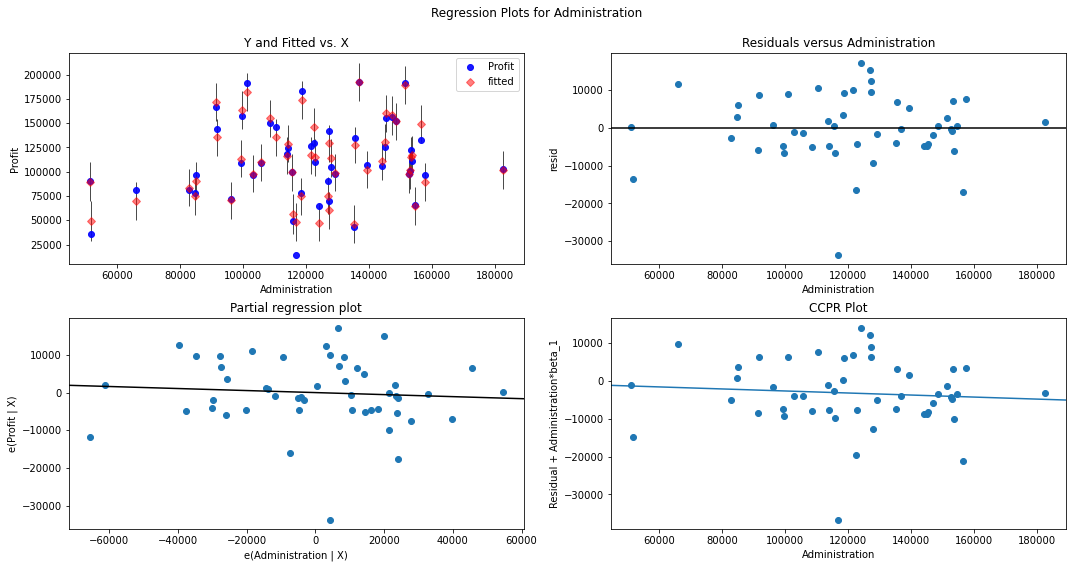

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [12]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-13-157d64fbab3a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(star)), np.round(c, 3))


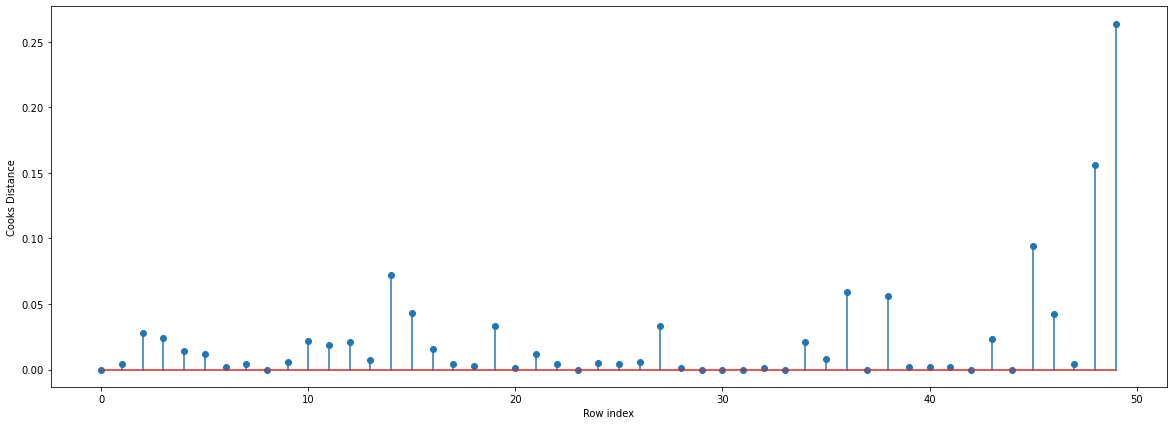

In [13]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(star)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543259)

In [17]:
new_data=pd.DataFrame({'Marketing_Spend':5000,'RD_Spend':4000,'Administration':40000,'State':'Florida'},index=[1])
model.predict(new_data)

1    52602.951601
dtype: float64